In [1]:
import HomologyBasis as HB
from divisivegater.simplex_tree import SimplexTree
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
from itertools import combinations
import time

In [2]:
def random_ball(num_points, center, dimension=3, radius=1):
    from numpy import random, linalg
    # First generate random directions by normalizing the length of a
    # vector of random-normal values (these distribute evenly on ball).
    random_directions = random.normal(size=(dimension,num_points))
    random_directions /= linalg.norm(random_directions, axis=0)
    # Second generate a random radius with probability proportional to
    # the surface area of a ball with a given radius.
    random_radii = random.random(num_points) ** (1/dimension)
    # Construct center point
    center_pt=[]
    for i in range(dimension):
        center_pt.append([center[i]]*num_points)
    # Return the list of random (direction & length) points.
    return ((radius * (random_directions * random_radii))+np.array(center_pt)).T

In [3]:
def random_circle(num_points, center, dimension, radius=1):
    from numpy import random, linalg
    # First generate random directions by normalizing the length of a
    # vector of random-normal values (these distribute evenly on ball).
    random_directions = random.normal(size=(dimension,num_points))
    random_directions /= linalg.norm(random_directions, axis=0)
    # Second generate a random radius with probability proportional to
    # the surface area of a ball with a given radius.
    random_radii = (random.random(num_points)+1.5) ** (1/2)
    center_pt=[]
    for i in range(dimension):
        center_pt.append([center[i]]*num_points)
    # Return the list of random (direction & length) points.
    return ((radius * (random_directions * random_radii))+np.array(center_pt)).T

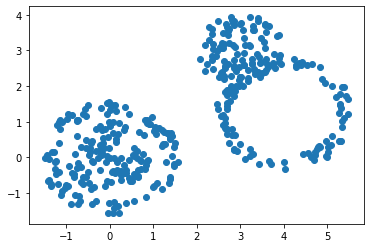

In [4]:
ball1=random_ball(num_points=100,center=[0]*2,dimension=2,radius=1)
circle1=random_circle(num_points=100,center=[0]*2,dimension=2,radius=1)
ball2=random_ball(num_points=100,center=[3,3],dimension=2,radius=1)
circle2=random_circle(num_points=100,center=[4,1.25],dimension=2,radius=1)
data=np.concatenate((ball1,ball2,circle1,circle2))

data_x=[]
data_y=[]
for pnt in data:
    data_x.append(pnt[0])
    data_y.append(pnt[1])
    
fig,ax=plt.subplots()
ax.scatter(data_x,data_y)

In [5]:
def persistence_check(pairs1,pairs2):
    for i in pairs1:
        for pair in pairs1[i]:
            if pair not in pairs2[i]:
                return False
    return True

In [6]:
max_dimension=2

hbp_time=list()
st_time=list()
iterations=list()

X=list([list(data[i]) for i in range(0,400)])
maximal_faces=[list(sigma) for sigma in combinations(range(0,len(X)),max_dimension+1)]

simplicial_complex = HB.simplicial_complex_from_maximal_faces(
    maximal_faces=maximal_faces, 
    max_dimension=max_dimension)

filt_fct = HB.dictionary_filtration_function(
    simplicial_complex=simplicial_complex,
    filtration_value_function=HB.rips_filtration_function(X))

degreewise_ordered_simplicial_complex = HB.degreewise_ordered_complex(simplicial_complex, filt_fct)

phom = HB.filtered_homology_basis(degreewise_ordered_simplicial_complex, 
                            max_face_card=max_dimension + 1, 
                            coeff_field=11)

persistent_homology_pairs = HB.persistence_pairs(
    homology_basis=phom,
    filtration_function=filt_fct,
    max_dimension=max_dimension)

st = SimplexTree()
for simplices in simplicial_complex:
    for face in simplices:
        st.insert(face, filt_fct(face))        
persistent_homology_pairs_st = {index: pairs for index, pairs in enumerate(st.persistent_homology(coeff_field=11))}

if persistence_check(persistent_homology_pairs_st,persistent_homology_pairs)==False:
    print('Fail')

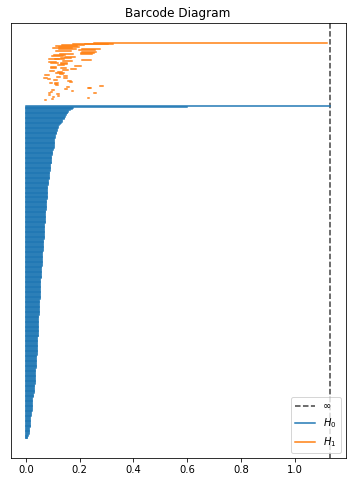

In [7]:
HB.barcodes(persistent_homology_pairs)

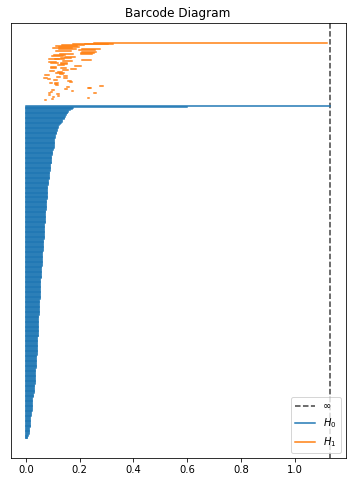

In [8]:
HB.barcodes(persistent_homology_pairs_st)

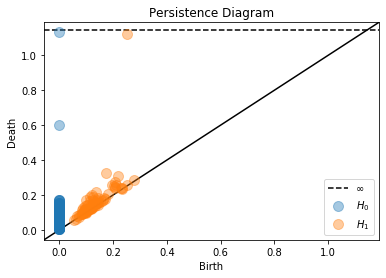

In [9]:
HB.plot_persistence(persistent_homology_pairs)

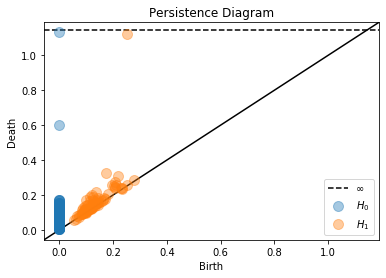

In [10]:
HB.plot_persistence(persistent_homology_pairs_st)